<a href="https://colab.research.google.com/github/garfield-gray/DataMining/blob/main/Clustering_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to do:
# read about skewness

# read that notebook

# Do it

# write the report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Theoretical

##Question 1

##Question 2

#Imperical

In [2]:
# Address of files
%cd /content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#5
!ls

/content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#5
CA5.pdf  Clustering_Methods.ipynb  data.csv


##Play with Data

In [3]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CLIENT_ID                        8950 non-null   object 
 1   ACCOUNT_BALANCE                  8950 non-null   float64
 2   BALANCE_UPDATE_FREQUENCY         8950 non-null   float64
 3   TOTAL_PURCHASES                  8950 non-null   float64
 4   SINGLE_PURCHASE_AMOUNT           8950 non-null   float64
 5   INSTALLMENT_PURCHASES_AMOUNT     8950 non-null   float64
 6   ADVANCE_CASH_AMOUNT              8950 non-null   float64
 7   PURCHASES_UPDATE_FREQUENCY       8950 non-null   float64
 8   SINGLE_PURCHASE_FREQUENCY        8950 non-null   float64
 9   INSTALLMENT_PURCHASES_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY           8950 non-null   float64
 11  CASH_ADVANCE_TRANSACTIONS        8950 non-null   int64  
 12  PURCHASES_TRANSACTIO

In [4]:
df.describe()

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


###A

###B

In [5]:
df.drop('CLIENT_ID', axis=1, inplace = True)

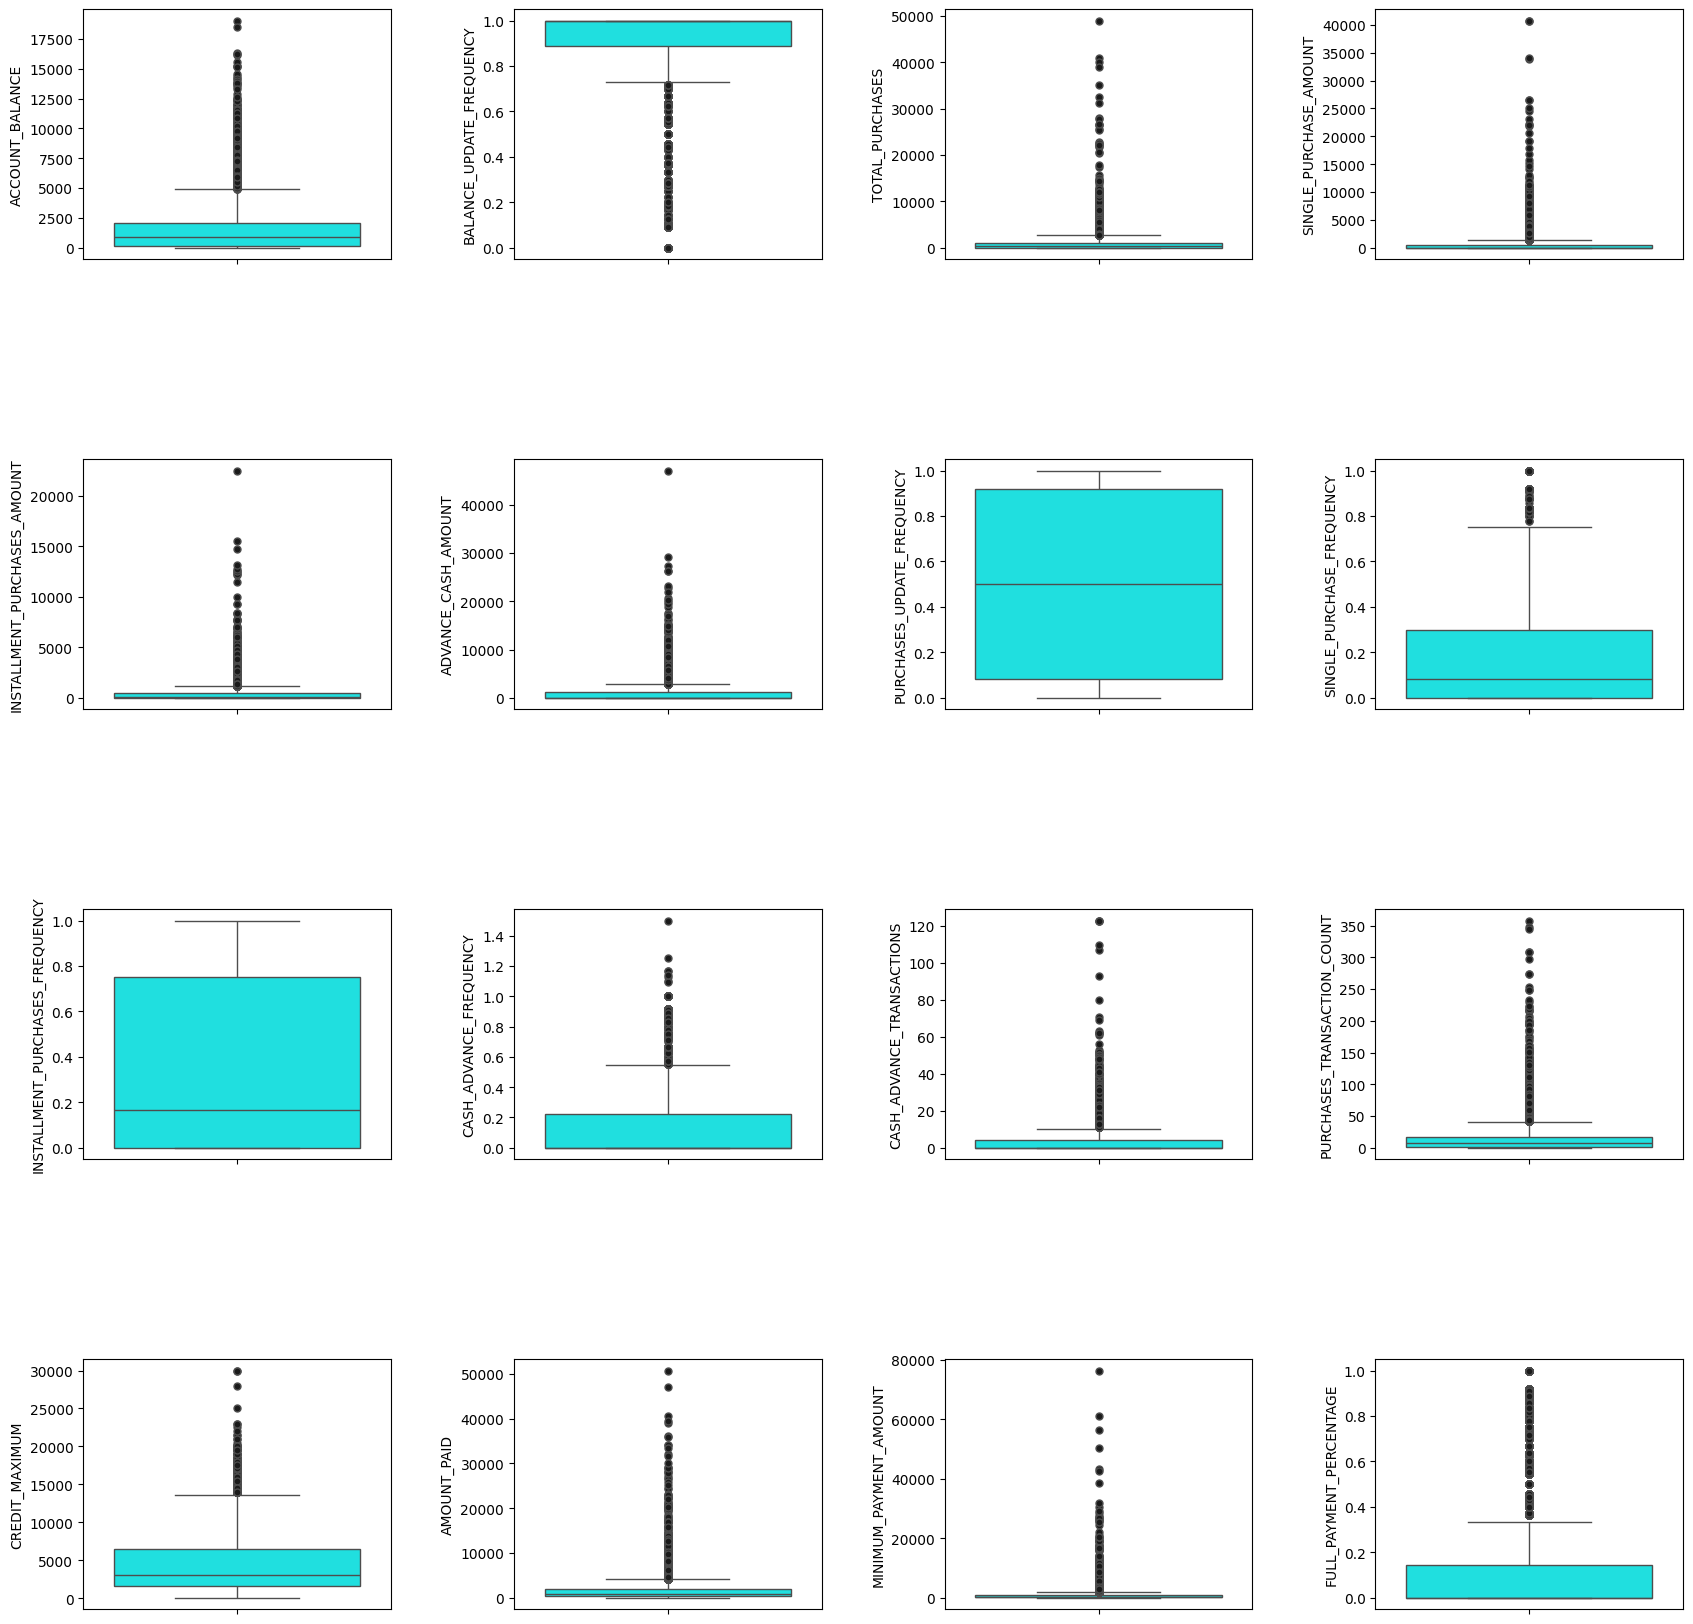

In [6]:

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):

    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]], color='aqua',flierprops = dict(markerfacecolor = '0.10', markersize = 5))

In [7]:
#finding outliers base on the Inter Quantile Range(IQR)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out

,count_out
ACCOUNT_BALANCE,695
BALANCE_UPDATE_FREQUENCY,1493
TOTAL_PURCHASES,808
SINGLE_PURCHASE_AMOUNT,1013
INSTALLMENT_PURCHASES_AMOUNT,867
ADVANCE_CASH_AMOUNT,1030
PURCHASES_UPDATE_FREQUENCY,0
SINGLE_PURCHASE_FREQUENCY,782
INSTALLMENT_PURCHASES_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


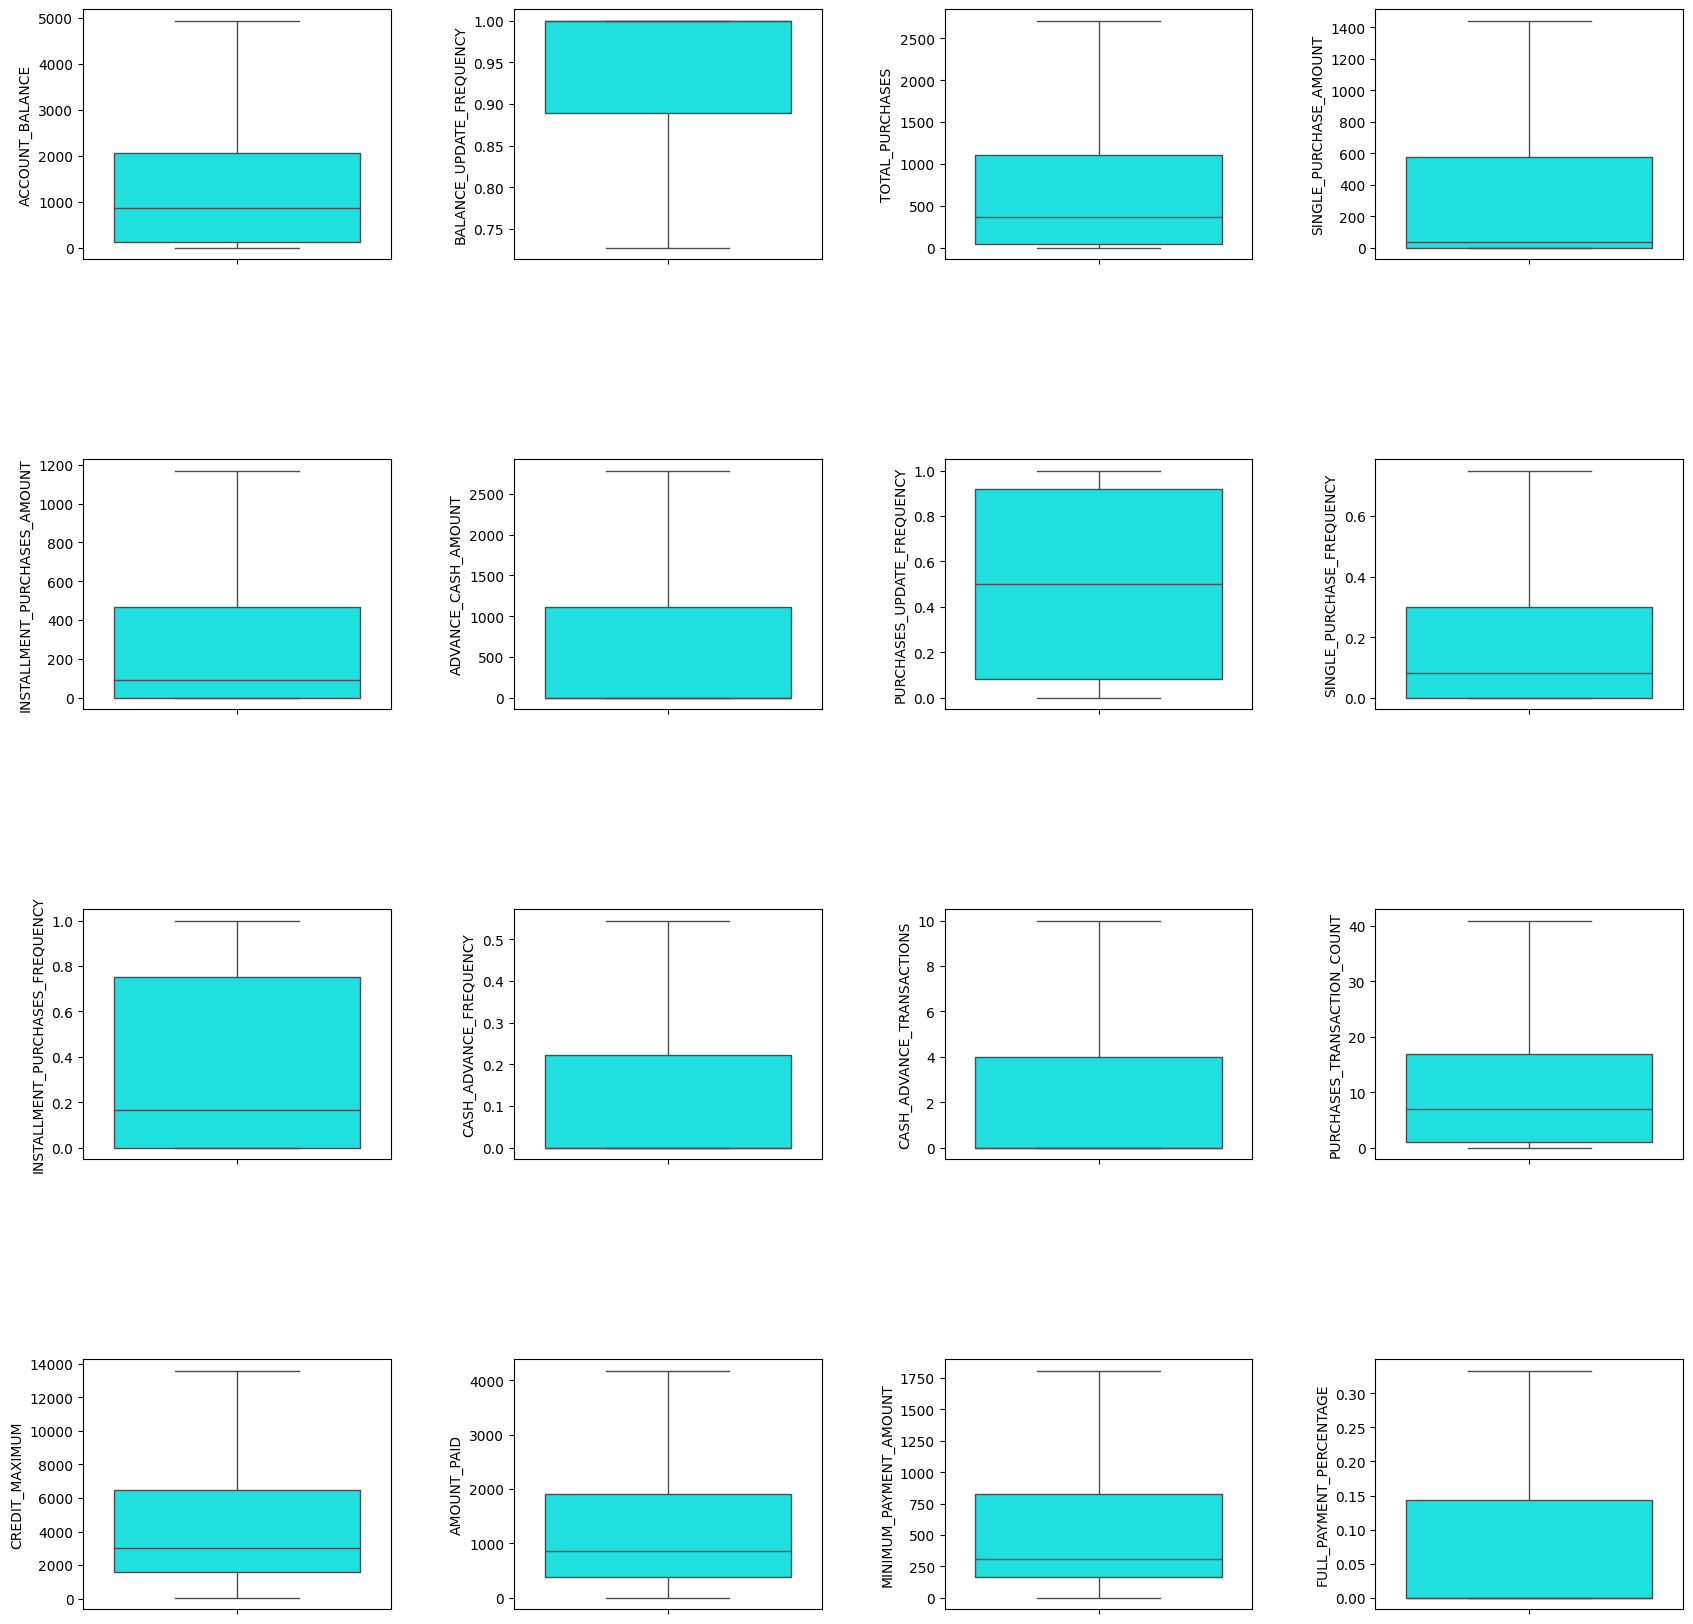

In [8]:
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[df.columns[i]],showfliers = False ,color='aqua')

In [10]:
# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(df["CREDIT_MAXIMUM"])
df[nulls_value]

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [11]:
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,ACCOUNT_BALANCE,BALANCE_UPDATE_FREQUENCY,TOTAL_PURCHASES,SINGLE_PURCHASE_AMOUNT,INSTALLMENT_PURCHASES_AMOUNT,ADVANCE_CASH_AMOUNT,PURCHASES_UPDATE_FREQUENCY,SINGLE_PURCHASE_FREQUENCY,INSTALLMENT_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRANSACTIONS,PURCHASES_TRANSACTION_COUNT,CREDIT_MAXIMUM,AMOUNT_PAID,MINIMUM_PAYMENT_AMOUNT,FULL_PAYMENT_PERCENTAGE,CREDIT_CARD_TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


###C

In [ ]:
#overview

df_overview = []
columns = df . columns . drop("CLIENT_ID")
for i in columns :
    types = df[i] . dtypes
    unique_data = df[i] . nunique()

    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)

    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'green', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,ACCOUNT_BALANCE,float64,8871,0,0.000000,0
1,BALANCE_UPDATE_FREQUENCY,float64,43,0,0.000000,0
2,TOTAL_PURCHASES,float64,6203,0,0.000000,0
3,SINGLE_PURCHASE_AMOUNT,float64,4014,0,0.000000,0
4,INSTALLMENT_PURCHASES_AMOUNT,float64,4452,0,0.000000,0
5,ADVANCE_CASH_AMOUNT,float64,4323,0,0.000000,0
6,PURCHASES_UPDATE_FREQUENCY,float64,47,0,0.000000,0
7,SINGLE_PURCHASE_FREQUENCY,float64,47,0,0.000000,0
8,INSTALLMENT_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000,0


#D

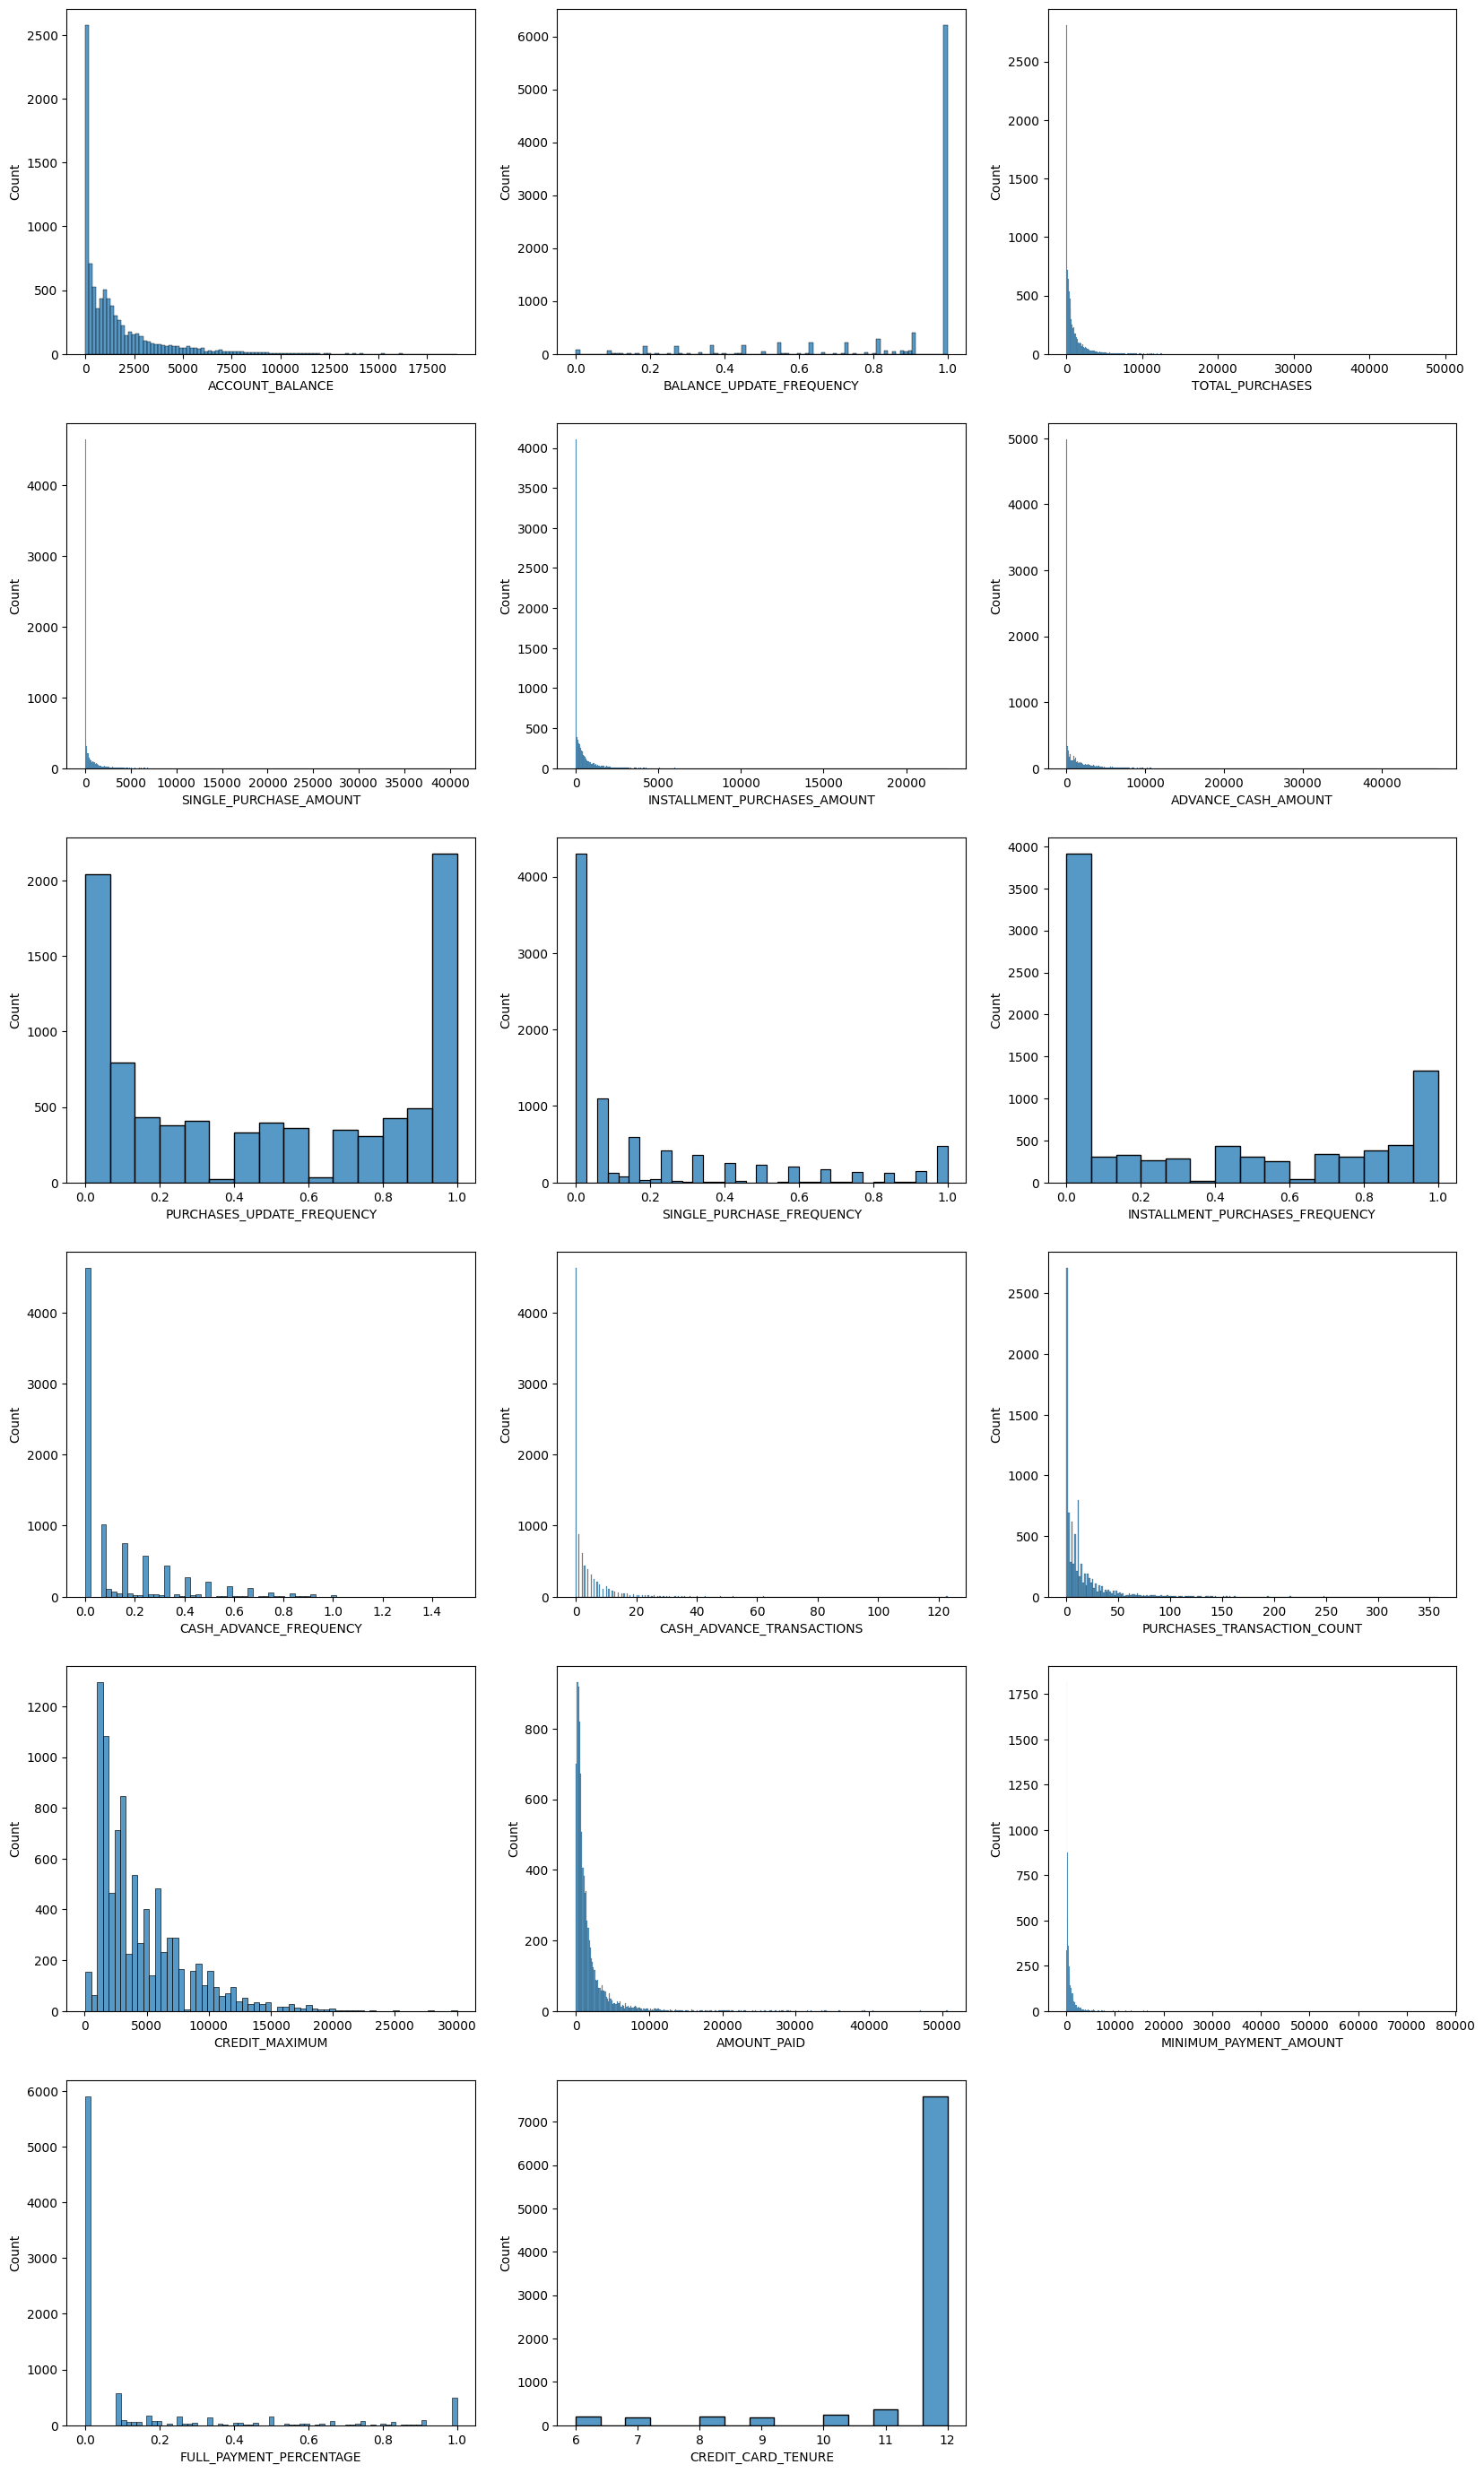

In [12]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot(df[col] , ax=ax)
        plt.xlabel(col)

plt.show()

###E

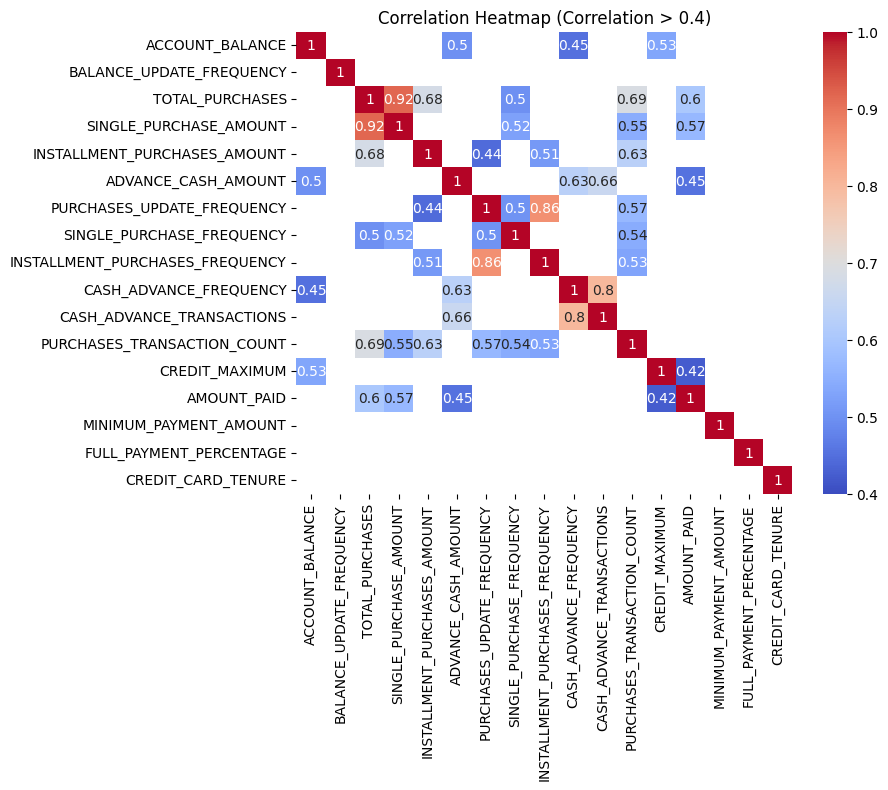

In [15]:
correlation_matrix = df.corr().abs()

# Filter correlation matrix for values greater than 0.4
high_corr_matrix = correlation_matrix[(correlation_matrix) > 0.4]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', vmin=0.4, vmax=1.0)
plt.title('Correlation Heatmap (Correlation > 0.4)')
plt.show()

##Preprpcessing

##Clustering